# CSC421 Fall 2023 Assignment 4 
### Author: George Tzanetakis 

This notebook is based on the topics covered in **Chapter 18 Learning ** and **Chapter 21 Deep Learning from the book *Artificial Intelligence: A Modern Approach.*  You are welcome and actually it can be educational to look at the code at the aima-code repository as well as other code resources you can find on the web. However, make sure you understand any code that you incoporate. 

The assignment structure is as follows - each item is worth 1 point: 

1. Create mini CIFAR-10 (Basic)   
2. SVM classification of CIFAR-10 (Basic) 
3. Naive Bayes Gaussian (Expected) 
4. Sort classes by prediction accuracy (Basic) 
5. Show misclassification examples (Expected) 
6. Compare raw image, histogram-of-gradients, and principal component analysis of hogs (Expected)
7. Change batch size and optimizer and compare (Basic) 
8. Add noise to test images (Expected)  
9. Generate synthetic dataset (4 colors, 4 shapes, 4 sizes, 4 x positions, 4 y positions) (Advanced)
10. Deep learning classification of synthetic dataset (Advanced) 



In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

# Question 1 (Basic) Create mini CIFAR-10 

Re-use the code from the deep learning notebook to load the CIFAR-10 training and test datasets. 
Create a mini CIFAR-10 dataset with 5000 instances for training and 5000 instances for testing. 
The examples in CIFAR-10 are randomly shuffled so you can simply take the first 5000 examples of each dataset. Print the shape of the resulting training set and test set. 



In [2]:
# Your code goes here 


transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 32

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=4)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=4)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


In [3]:
from tabulate import tabulate

# Assuming trainset and testset are your original datasets

# Reduce the number of samples in the training set to 1000
trainset.data = trainset.data[:5000]
trainset.targets = trainset.targets[:5000]

testset.data = testset.data[:5000]
testset.targets = testset.targets[:5000]

# Update the print statements for the training set
print('Training set')
print(f'Samples: {trainset.data.shape}')
print(f'Labels: {len(trainset.targets)}')

# Update the print statements for the test set
print('\nTest set')
print(f'Samples: {testset.data.shape}')  # Note: Use [:5000] if you also want to limit the test set
print(f'Labels: {len(testset.targets)}')

# Print only the first 5000 classes
print('\nClasses\n')
print(tabulate(
    list(trainset.class_to_idx.items())[:5000], headers=['Name', 'Index'], 
    tablefmt='orgtbl'
))


Training set
Samples: (5000, 32, 32, 3)
Labels: 5000

Test set
Samples: (5000, 32, 32, 3)
Labels: 5000

Classes

| Name       |   Index |
|------------+---------|
| airplane   |       0 |
| automobile |       1 |
| bird       |       2 |
| cat        |       3 |
| deer       |       4 |
| dog        |       5 |
| frog       |       6 |
| horse      |       7 |
| ship       |       8 |
| truck      |       9 |


# Question 2 (Basic)  - SVM  

Train a SVM classifier on PCA dimensionality reduced Histogram of Oriented Gradients features. You can re-use the code from the deep learning notebook but instead of using the full training and testing sets use the mini-CIFAR-10 datset you created in question 1. Report the classification accuracy and confusion matrix. 



In [4]:
# Your code goes here 

import matplotlib.pyplot as plt
import numpy as np

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

print('Training set')
print(f'Samples: {trainset.data.shape}')
print(f'Labels: {len(trainset.targets)}')
print(type(trainset.data))
print(type(trainset.targets))
print('\nTest set')
print(f'Samples: {testset.data.shape}')
print(f'Labels: {len(testset.targets)}')

train_n_samples = len(trainset.data)
print(train_n_samples)
test_n_samples = len(testset.data)
print(test_n_samples)

Xtrain = trainset.data
Xtest  = testset.data



from skimage.feature import hog
Xtrain_hog = []
for i in range(len(Xtrain)):
    fd  = hog(Xtrain[i] , orientations=9 , pixels_per_cell = (8,8),
                     cells_per_block = (2,2) , visualize = False, channel_axis=-1)
    Xtrain_hog.append(fd)
    if ((i % 10000) == 0): 
        print(i)

Xtrain_hog = np.array(Xtrain_hog)
print('Done calculating HOGs for training')
print(Xtrain_hog.shape)

Xtest_hog = []
for i in range(len(Xtest)):
    fd = hog(Xtest[i] , orientations=9 , pixels_per_cell = (8,8),
                     cells_per_block = (2,2) , visualize = False, channel_axis=-1)
    Xtest_hog.append(fd)
    if ((i % 1000) == 0): 
        print(i)
        
Xtest_hog = np.array(Xtest_hog)
print('Done calculating HOGs for testing')

ytrain = trainset.targets
ytest  = testset.targets

from sklearn.decomposition import PCA
pca = PCA(0.8)
Xtrain_pca = pca.fit_transform(Xtrain_hog)
Xtest_pca  = pca.transform(Xtest_hog)
print(Xtrain_pca.shape)
print(Xtest_pca.shape)



Training set
Samples: (5000, 32, 32, 3)
Labels: 5000
<class 'numpy.ndarray'>
<class 'list'>

Test set
Samples: (5000, 32, 32, 3)
Labels: 5000
5000
5000
0
Done calculating HOGs for training
(5000, 324)
0
1000
2000
3000
4000
Done calculating HOGs for testing
(5000, 63)
(5000, 63)


[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1]
[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9, 7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0, 7]
              precision    recall  f1-score   support

           0       0.55      0.62      0.58       488
           1       0.69      0.70      0.69       505
           2       0.47      0.47      0.47       512
           3       0.36      0.35      0.36       497
           4       0.48      0.48      0.48       507
           5       0.41      0.38      0.39       488
           6       

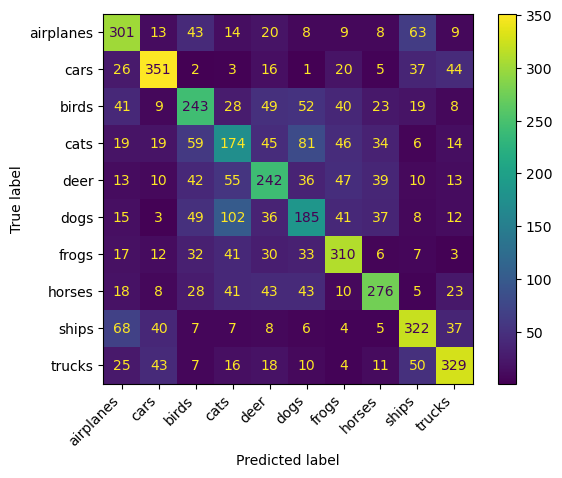

CPU times: total: 10.8 s
Wall time: 10.6 s


In [5]:
%%time 

Xtrain_pca = Xtrain_pca[0:5000]
ytrain = ytrain[0:5000] 
Xtest_pca = Xtest_pca[0:5000]
ytest = ytest[0:5000]


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Create a classifier: a support vector classifier
clf = svm.SVC(C=10, cache_size=10000)
clf.fit(Xtrain_pca, ytrain)
print(ytrain[0:100])
print(ytest[0:100])
ytest_predict  = clf.predict(Xtest_pca)
print(classification_report(ytest, ytest_predict))

color = 'white'
cm = confusion_matrix(ytest, ytest_predict)
disp = ConfusionMatrixDisplay(cm, display_labels=['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 
                                                  'frogs', 'horses', 'ships', 'trucks'])
disp.plot()
plt.xticks(rotation=45, ha='right')
plt.show()

In [6]:
# ... (previous code)
'''
# Fit the classifier
clf = svm.SVC(C=10, cache_size=10000)
clf.fit(Xtrain_pca, ytrain)

# Predict on the test set
ytest_predict = clf.predict(Xtest_pca)

# Print classification report
print(classification_report(ytest, ytest_predict))

# Calculate and display confusion matrix with correct class labels
cm = confusion_matrix(ytest, ytest_predict)
disp = ConfusionMatrixDisplay(cm, display_labels=[str(i) for i in range(10)])
disp.plot()
plt.xticks(rotation=45, ha='right')
plt.show()

# Iterate through each test sample
for i in range(len(ytest)):
    true_label = ytest[i]
    predicted_label = ytest_predict[i]

    # Check if there is a misclassification
    if true_label != predicted_label:
        print(f"Sample {i}: True label - {true_label}, Predicted label - {predicted_label}")

# ... (rest of the code)
'''

'\n# Fit the classifier\nclf = svm.SVC(C=10, cache_size=10000)\nclf.fit(Xtrain_pca, ytrain)\n\n# Predict on the test set\nytest_predict = clf.predict(Xtest_pca)\n\n# Print classification report\nprint(classification_report(ytest, ytest_predict))\n\n# Calculate and display confusion matrix with correct class labels\ncm = confusion_matrix(ytest, ytest_predict)\ndisp = ConfusionMatrixDisplay(cm, display_labels=[str(i) for i in range(10)])\ndisp.plot()\nplt.xticks(rotation=45, ha=\'right\')\nplt.show()\n\n# Iterate through each test sample\nfor i in range(len(ytest)):\n    true_label = ytest[i]\n    predicted_label = ytest_predict[i]\n\n    # Check if there is a misclassification\n    if true_label != predicted_label:\n        print(f"Sample {i}: True label - {true_label}, Predicted label - {predicted_label}")\n\n# ... (rest of the code)\n'

# Question 3 (Expected) - Gaussian Naive Bayes Classifier 

Repeat the training and evaluation of the mini-CIFAR-10 dataset using the Gaussian Naive Bayes 
classifier from scikit-learn: [Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)
Similarly report on the classification accuracy and confusion matrix. 

              precision    recall  f1-score   support

           0       0.49      0.50      0.50       488
           1       0.61      0.59      0.60       505
           2       0.40      0.36      0.38       512
           3       0.38      0.28      0.32       497
           4       0.38      0.49      0.43       507
           5       0.39      0.35      0.37       488
           6       0.45      0.68      0.54       491
           7       0.56      0.49      0.52       495
           8       0.53      0.51      0.52       504
           9       0.61      0.55      0.57       513

    accuracy                           0.48      5000
   macro avg       0.48      0.48      0.47      5000
weighted avg       0.48      0.48      0.47      5000



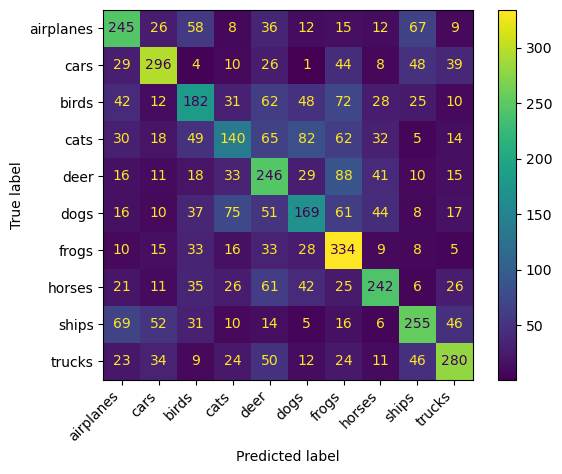

In [7]:
# YOUR CODE GOES HERE 

Xtrain_pca = Xtrain_pca[0:5000]
ytrain = ytrain[0:5000] 
Xtest_pca = Xtest_pca[0:5000]
ytest = ytest[0:5000]

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Create a classifier: a support vector classifier
gnb = GaussianNB()
gnb.fit(Xtrain_pca, ytrain)

ytest_predict  = gnb.predict(Xtest_pca)
print(classification_report(ytest, ytest_predict))

color = 'white'
cm_gaus = confusion_matrix(ytest, ytest_predict)
disp = ConfusionMatrixDisplay(cm_gaus, display_labels=['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 
                                                       'frogs', 'horses', 'ships', 'trucks'])
disp.plot()
plt.xticks(rotation=45, ha='right')
plt.show()

 # Question 4 (Expected) - Sort classes by prediction accuracy 
 
Write a function that takes as input the computed confusion matrix and returns a list of classes sorted by classification accuracy. Each item in the list should be a tuple of the form (class, accuracy). Show the outpput for the SVM and Gaussian NB classifiers for the mini CIFAR-10 dataset. 


In [8]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

def get_accuracy_by_class(confusion_matrix, class_names):
    num_classes = confusion_matrix.shape[0]
    accuracy_by_class = []

    for i in range(num_classes):
        correct_predictions = confusion_matrix[i, i]
        total_predictions = np.sum(confusion_matrix[i, :])

        accuracy = (correct_predictions / total_predictions) * 100 if total_predictions > 0 else 0
        class_name = class_names[i]
        accuracy_by_class.append((class_name, accuracy))

    # Sort the list by accuracy in descending order
    accuracy_by_class.sort(key=lambda x: x[1], reverse=True)

    return accuracy_by_class

# Assuming you have executed the SVM and Gaussian NB code
# For SVM
class_labels=['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks']
svm_accuracy_by_class = get_accuracy_by_class(cm, class_labels)
print("SVM Accuracy by Class:")
for class_acc in svm_accuracy_by_class:
    print(f"Class {class_acc[0]}: {class_acc[1]:.2f}%")

# For Gaussian NB
gnb_accuracy_by_class = get_accuracy_by_class(cm_gaus, class_labels)
print("\nGaussian NB Accuracy by Class:")
for class_acc in gnb_accuracy_by_class:
    print(f"Class {class_acc[0]}: {class_acc[1]:.2f}%")


SVM Accuracy by Class:
Class cars: 69.50%
Class trucks: 64.13%
Class ships: 63.89%
Class frogs: 63.14%
Class airplanes: 61.68%
Class horses: 55.76%
Class deer: 47.73%
Class birds: 47.46%
Class dogs: 37.91%
Class cats: 35.01%

Gaussian NB Accuracy by Class:
Class frogs: 68.02%
Class cars: 58.61%
Class trucks: 54.58%
Class ships: 50.60%
Class airplanes: 50.20%
Class horses: 48.89%
Class deer: 48.52%
Class birds: 35.55%
Class dogs: 34.63%
Class cats: 28.17%


# Question 5 (Expected) - Show misclassification examples  

Write a function that takes as input a particular class (for example dog) and shows an array 
of images (similar to the functions showing images in the deep learning notebook) in which each row contains 10 example images from another class that were misclassified. The resulting grid will have 9 rows (one for each class other than the input class) and 10 examples. For example the row for truck would have images of trucks that were misclassified as dogs. Show the output of this function for the SVM classifier and the class horse. 





In [9]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

def display_images_in_line(label_to_display, num_images=10):
    # Define the dictionary to store images for each label
    image_dict = {label: [] for label in classes}

    # Iterate through the entire dataset
    for images, labels in trainloader:
        for i in range(len(labels)):
            label = classes[labels[i].item()]
            image_dict[label].append(images[i])

    # Retrieve images for the specified label
    images_to_display = image_dict[label_to_display][:num_images]

    # Create a single row grid of images using subplots
    fig, axes = plt.subplots(1, num_images, figsize=(15, 2))  # Adjust figsize as needed

    # Iterate through the images and display them
    for i in range(len(images_to_display)):
        axes[i].imshow(np.transpose(images_to_display[i].numpy() / 2 + 0.5, (1, 2, 0)))
        axes[i].axis('off')

    # Display the line of images
    plt.show()

[18, 8, 28, 41, 43, 43, 10, 276, 5, 23]
['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'ship', 'truck']
[18, 8, 28, 41, 43, 43, 10, 5, 23]
horse Misclassified as plane


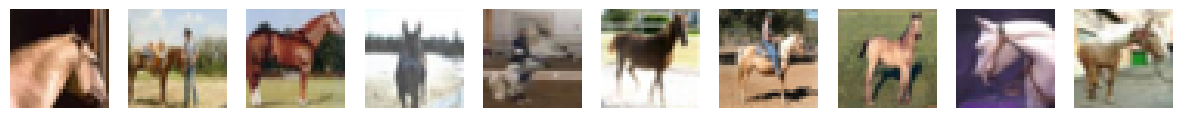

horse Misclassified as car


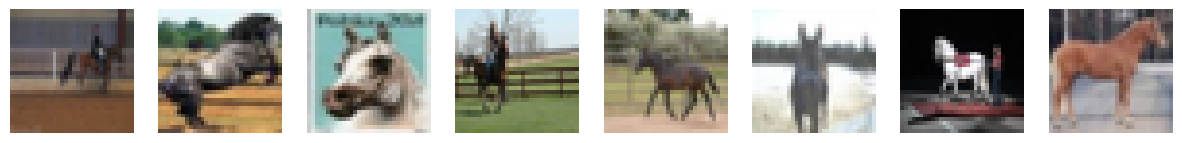

horse Misclassified as bird


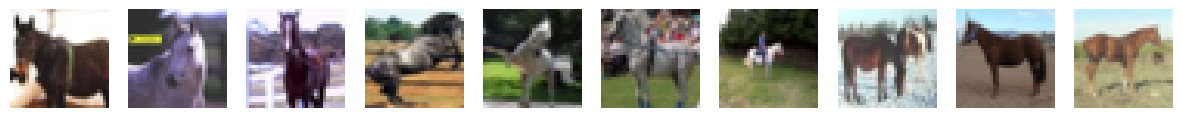

horse Misclassified as cat


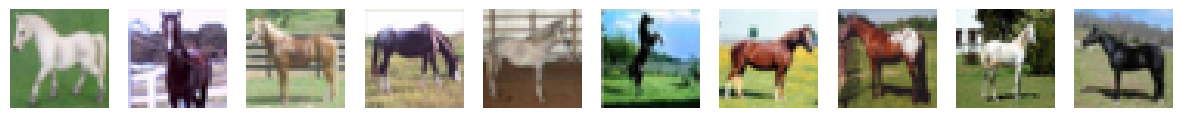

horse Misclassified as deer


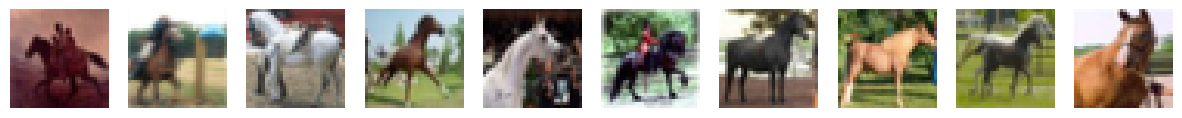

horse Misclassified as dog


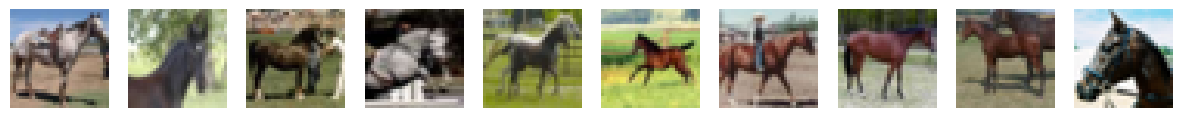

horse Misclassified as frog


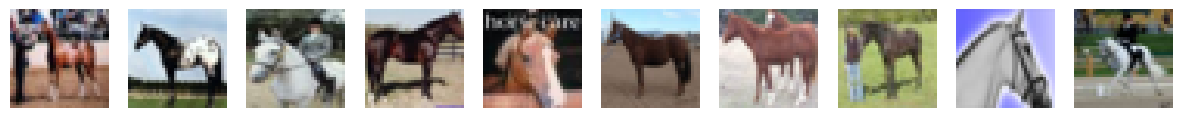

horse Misclassified as ship


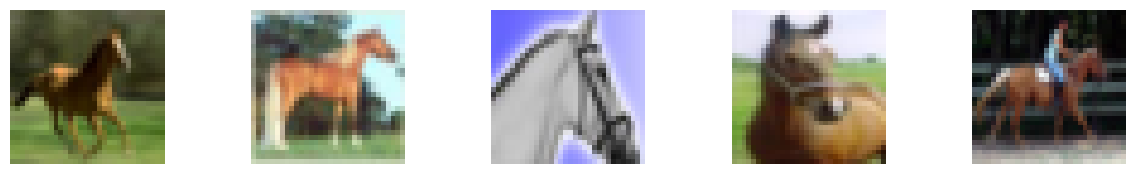

horse Misclassified as truck


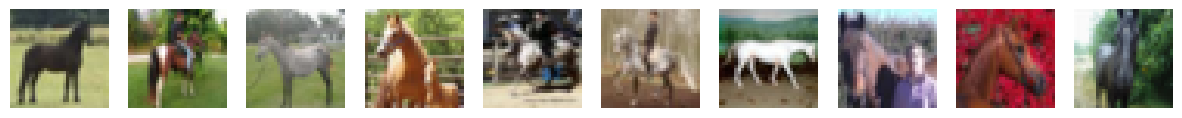

In [10]:
def RetriecveParameters(clas,cm):
    DictClassNumbers = {'plane': 1, 'car': 2, 'bird': 3, 'cat': 4, 'deer': 5, 'dog': 6, 'frog': 7, 'horse': 8, 'ship': 9, 
                        'truck': 10}
    Labels = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    for keys, value in DictClassNumbers.items():
        if keys == clas:
            retrieve = cm[value - 1].tolist()
            print(retrieve)
            del retrieve[value - 1]
            del Labels[value - 1]
            print(Labels)
            print(retrieve)
            
            for bro , bruh in zip(Labels, retrieve):
                if bruh > 10:
                    num = 10
                    print(f"{clas} Misclassified as {bro}")
                    display_images_in_line(clas , num)
                else:
                    print(f"{clas} Misclassified as {bro}")
                    display_images_in_line(clas , bruh)
            
classs = 'horse'
RetriecveParameters(classs,cm)

# Question 6 (Expected) - Comparison of different features 

In the deep learning notebook the CIFAR-10 classification code using SVM utilizes a histogram of oriented gradients features followed by a PCA transformation for dimensionality reduction. 
Using the mini-CIFAR-10 dataset compare the following three feature front-ends using SVM classificaiton (use the same parameters as the deep learning notebook): 

1. Flatten the training images to a single (32 * 32 * 3) vector
2. Compute the Histogram of Gradients
3. Computer the Histogram of Gradients followed by PCA (as done in the deep learning notebook).

Compare these three feature front ends by showing the corresponding classification accurarcy and confusion matrices for each one. 


In [11]:

print(Xtrain.shape)

Xtrain_flattened = Xtrain.reshape(-1, 32 * 32 * 3)
Xtest_flattened = Xtest.reshape(-1, 32 * 32 * 3)

print(Xtrain_flattened.shape)


(5000, 32, 32, 3)
(5000, 3072)


# Flatten the training images to a single (32 * 32 * 3) vector

              precision    recall  f1-score   support

           0       0.46      0.52      0.49       488
           1       0.57      0.54      0.56       505
           2       0.34      0.37      0.36       512
           3       0.30      0.29      0.30       497
           4       0.40      0.41      0.41       507
           5       0.35      0.31      0.33       488
           6       0.49      0.49      0.49       491
           7       0.54      0.46      0.50       495
           8       0.56      0.65      0.60       504
           9       0.52      0.50      0.51       513

    accuracy                           0.45      5000
   macro avg       0.45      0.45      0.45      5000
weighted avg       0.45      0.45      0.45      5000



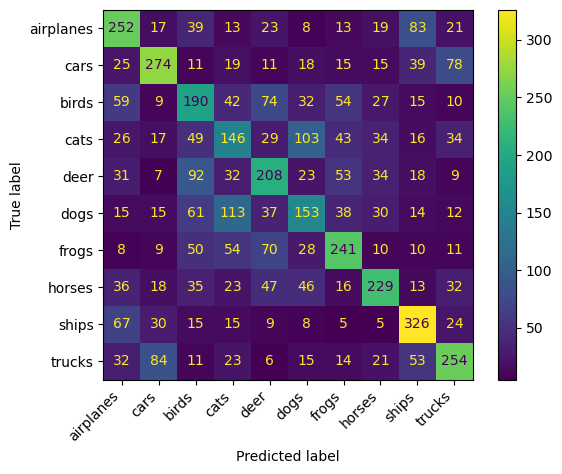

CPU times: total: 6min 19s
Wall time: 6min 29s


In [12]:
%%time 
Xtrain_flattenedd = Xtrain_flattened
ytrain = ytrain
Xtest_flatenedd = Xtest_flattened
ytest = ytest

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Create a classifier: a support vector classifier
clf = svm.SVC(C=10, cache_size=10000)
clf.fit(Xtrain_flattenedd, ytrain)

ytest_predict  = clf.predict(Xtest_flatenedd)
print(classification_report(ytest, ytest_predict))

color = 'white'
cm = confusion_matrix(ytest, ytest_predict)
disp = ConfusionMatrixDisplay(cm, display_labels=['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks'])
disp.plot()
plt.xticks(rotation=45, ha='right')
plt.show()

# Histogram of Gradients

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1]
[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9, 7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0, 7]
              precision    recall  f1-score   support

           0       0.57      0.65      0.60       488
           1       0.70      0.72      0.71       505
           2       0.45      0.49      0.47       512
           3       0.40      0.38      0.39       497
           4       0.49      0.50      0.50       507
           5       0.44      0.39      0.41       488
           6       

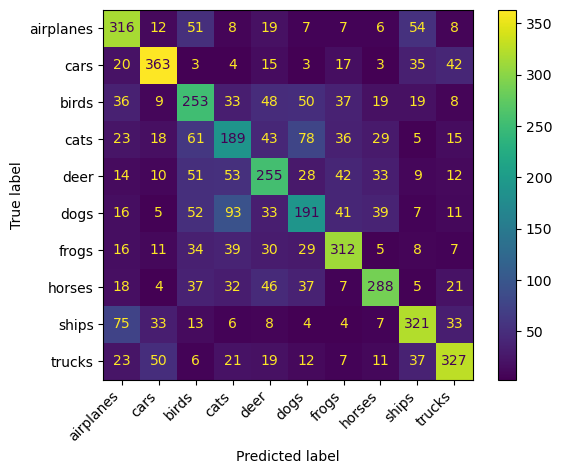

CPU times: total: 25.4 s
Wall time: 26.7 s


In [13]:
%%time 

Xtrain_hog = Xtrain_hog[0:5000]
ytrain = ytrain[0:5000] 
Xtest_hog = Xtest_hog[0:5000]
ytest = ytest[0:5000]


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Create a classifier: a support vector classifier
clf = svm.SVC(C=10, cache_size=10000)
clf.fit(Xtrain_hog, ytrain)
print(ytrain[0:100])
print(ytest[0:100])
ytest_predict  = clf.predict(Xtest_hog)
print(classification_report(ytest, ytest_predict))

color = 'white'
cm = confusion_matrix(ytest, ytest_predict)
disp = ConfusionMatrixDisplay(cm, display_labels=['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 
                                                  'frogs', 'horses', 'ships', 'trucks'])
disp.plot()
plt.xticks(rotation=45, ha='right')
plt.show()

# PCA

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1]
[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9, 7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0, 7]
              precision    recall  f1-score   support

           0       0.55      0.62      0.58       488
           1       0.69      0.70      0.69       505
           2       0.47      0.47      0.47       512
           3       0.36      0.35      0.36       497
           4       0.48      0.48      0.48       507
           5       0.41      0.38      0.39       488
           6       

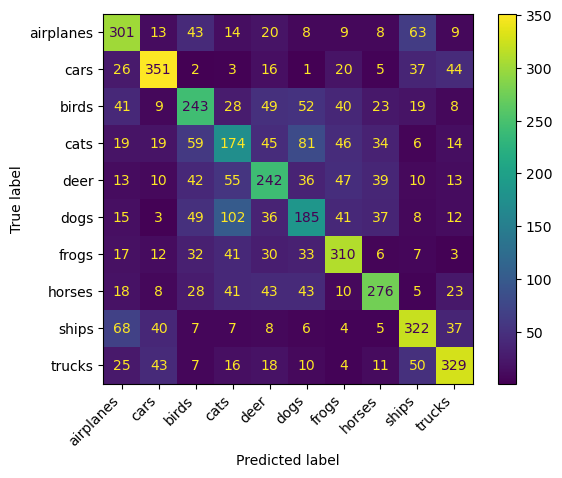

CPU times: total: 11.5 s
Wall time: 12.5 s


In [14]:
%%time 

Xtrain_pca = Xtrain_pca[0:5000]
ytrain = ytrain[0:5000] 
Xtest_pca = Xtest_pca[0:5000]
ytest = ytest[0:5000]


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Create a classifier: a support vector classifier
clf = svm.SVC(C=10, cache_size=10000)
clf.fit(Xtrain_pca, ytrain)
print(ytrain[0:100])
print(ytest[0:100])
ytest_predict  = clf.predict(Xtest_pca)
print(classification_report(ytest, ytest_predict))

color = 'white'
cm = confusion_matrix(ytest, ytest_predict)
disp = ConfusionMatrixDisplay(cm, display_labels=['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 
                                                  'frogs', 'horses', 'ships', 'trucks'])
disp.plot()
plt.xticks(rotation=45, ha='right')
plt.show()

# QUESTION 7 (Basic) - Deep learning classification  

Retrain the deep neural network specified in the deep learning notebook. You will need to install PyTorch for your system. You don't need to use the GPU unless you have one and can set it up. 
Your training time will depend on your hardware on my laptop with CPU it takes about 4 minutes and with GPU about 2 minutes. It should not be more than 30 minutes even on an old slow laptop. Another option is to use Google Colab. 

Once you have trained and evaluated the network and got numbers similar to the deep learning notebook change the batch size to 16. Repeat the training and report on how the accuracy and training time changed. 



In [39]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 32

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=4)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=4)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [40]:
from tabulate import tabulate

print('Training set')
print(f'Samples: {trainset.data.shape}')
print(f'Labels: {len(trainset.targets)}')

print('\nTest set')
print(f'Samples: {testset.data.shape}')
print(f'Labels: {len(testset.targets)}')

print('\nClasses\n')
print(tabulate(
    list(trainset.class_to_idx.items()), headers=['Name', 'Index'], 
    tablefmt='orgtbl'
))

Training set
Samples: (50000, 32, 32, 3)
Labels: 50000

Test set
Samples: (10000, 32, 32, 3)
Labels: 10000

Classes

| Name       |   Index |
|------------+---------|
| airplane   |       0 |
| automobile |       1 |
| bird       |       2 |
| cat        |       3 |
| deer       |       4 |
| dog        |       5 |
| frog       |       6 |
| horse      |       7 |
| ship       |       8 |
| truck      |       9 |


In [5]:
# Your code goes here 

torch.cuda.is_available()

dev = None
if torch.cuda.is_available(): 
    dev = "cuda:0" 
    torch.cuda.get_device_name(0)
    print(torch.cuda.get_device_name(0))
else: 
     dev = "cpu"

#dev = "cpu" 
device = torch.device(dev)  
print(device)

cpu


In [8]:
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,32,5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 32, 5)
        self.fc1 = nn.Linear(32 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
net.to(device)
print(net)

summary(net, (3,32,32), batch_size=32, device=dev)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [32, 32, 28, 28]           2,432
         MaxPool2d-2           [32, 32, 14, 14]               0
            Conv2d-3           [32, 32, 10, 10]          25,632
         MaxPool2d-4             [32, 32, 5, 5]               0
            Linear-5                  [32, 120]          96,120
            Linear-6                   [32, 84]          10,164
            Linear-7                   [32, 10]             850
Total params: 135,198
Train

In [43]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [44]:
%%time
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device,non_blocking=True), labels.to(device, non_blocking=True)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
        if i % 400 == 399:    # print every 400 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,   400] loss: 0.460
[1,   800] loss: 0.451
[1,  1200] loss: 0.415
[2,   400] loss: 0.366
[2,   800] loss: 0.345
[2,  1200] loss: 0.333
[3,   400] loss: 0.314
[3,   800] loss: 0.305
[3,  1200] loss: 0.297
[4,   400] loss: 0.284
[4,   800] loss: 0.278
[4,  1200] loss: 0.276
[5,   400] loss: 0.262
[5,   800] loss: 0.258
[5,  1200] loss: 0.253
[6,   400] loss: 0.243
[6,   800] loss: 0.241
[6,  1200] loss: 0.231
[7,   400] loss: 0.224
[7,   800] loss: 0.221
[7,  1200] loss: 0.221
[8,   400] loss: 0.209
[8,   800] loss: 0.206
[8,  1200] loss: 0.204
[9,   400] loss: 0.194
[9,   800] loss: 0.195
[9,  1200] loss: 0.195
[10,   400] loss: 0.186
[10,   800] loss: 0.183
[10,  1200] loss: 0.186
[11,   400] loss: 0.174
[11,   800] loss: 0.176
[11,  1200] loss: 0.175
[12,   400] loss: 0.166
[12,   800] loss: 0.167
[12,  1200] loss: 0.168
[13,   400] loss: 0.160
[13,   800] loss: 0.159
[13,  1200] loss: 0.157
[14,   400] loss: 0.153
[14,   800] loss: 0.151
[14,  1200] loss: 0.154
[15,   400] loss: 0

In [45]:
def test_accuracy(net, testloader, device):
    correct = 0

    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        net.eval()
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)

            # calculate outputs by running images through the network
            outputs = net(images)

            # the class with the highest energy is what we choose as prediction
            predicted = torch.max(outputs.data, 1)[1]

            correct += (predicted == labels).sum().item()
    
    return correct / len(testloader.dataset)
    
    
def test_accuracy_per_class(net, testloader, device):
    correct_pred = {classname: 0 for classname in trainset.classes}
    total_pred = {classname: 0 for classname in trainset.classes}

    with torch.no_grad():
        net.eval()
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)

            outputs = net(images)
            predicted = torch.max(outputs.data, 1)[1]

            # collect the correct predictions for each class
            for label, prediction in zip(labels, predicted):
                if label == prediction:
                    correct_pred[trainset.classes[label]] += 1
                total_pred[trainset.classes[label]] += 1
    
    accuracy_per_class = {classname: 0 for classname in trainset.classes}
    for classname, correct_count in correct_pred.items():
        accuracy = (100 * float(correct_count)) / total_pred[classname]
        accuracy_per_class[classname] = accuracy

    return accuracy_per_class


test_acc = test_accuracy(net, testloader, 'cpu')
print(f'Best trial test set accuracy: {test_acc}')

overall_accuracy = test_accuracy(net, testloader, dev)

print(
    'Overall accuracy of the network  '
    f'{(overall_accuracy * 100):.2f} %\n'
    'on the 10000 test images'
)

accuracy_per_class = test_accuracy_per_class(net, testloader, dev)

print('Accuracy per class\n')
for classname, accuracy in accuracy_per_class.items():
    print(f'{classname:12s} {accuracy:.2f} %')

Best trial test set accuracy: 0.7138
Overall accuracy of the network  71.38 %
on the 10000 test images
Accuracy per class

airplane     75.60 %
automobile   86.20 %
bird         63.20 %
cat          55.10 %
deer         66.90 %
dog          53.40 %
frog         80.10 %
horse        78.50 %
ship         79.50 %
truck        75.30 %


In [9]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 16

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=4)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=4)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [11]:
from torchsummary import summary

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,32,5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 32, 5)
        self.fc1 = nn.Linear(32 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
net.to(device)
print(net)

summary(net, (3,32,32), batch_size=16, device=dev)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [16, 32, 28, 28]           2,432
         MaxPool2d-2           [16, 32, 14, 14]               0
            Conv2d-3           [16, 32, 10, 10]          25,632
         MaxPool2d-4             [16, 32, 5, 5]               0
            Linear-5                  [16, 120]          96,120
            Linear-6                   [16, 84]          10,164
            Linear-7                   [16, 10]             850
Total params: 135,198
Train

In [48]:
%%time
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device,non_blocking=True), labels.to(device, non_blocking=True)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
        if i % 400 == 399:    # print every 400 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,   400] loss: 0.461
[1,   800] loss: 0.461
[1,  1200] loss: 0.461
[1,  1600] loss: 0.461
[1,  2000] loss: 0.461
[1,  2400] loss: 0.461
[1,  2800] loss: 0.461
[2,   400] loss: 0.461
[2,   800] loss: 0.461
[2,  1200] loss: 0.461
[2,  1600] loss: 0.461
[2,  2000] loss: 0.461
[2,  2400] loss: 0.461
[2,  2800] loss: 0.461
[3,   400] loss: 0.461
[3,   800] loss: 0.461
[3,  1200] loss: 0.461
[3,  1600] loss: 0.461
[3,  2000] loss: 0.461
[3,  2400] loss: 0.461
[3,  2800] loss: 0.461
[4,   400] loss: 0.461
[4,   800] loss: 0.461
[4,  1200] loss: 0.461
[4,  1600] loss: 0.461
[4,  2000] loss: 0.461
[4,  2400] loss: 0.461
[4,  2800] loss: 0.461
[5,   400] loss: 0.461
[5,   800] loss: 0.461
[5,  1200] loss: 0.461
[5,  1600] loss: 0.461
[5,  2000] loss: 0.461
[5,  2400] loss: 0.461
[5,  2800] loss: 0.461
[6,   400] loss: 0.461
[6,   800] loss: 0.461
[6,  1200] loss: 0.461
[6,  1600] loss: 0.461
[6,  2000] loss: 0.461
[6,  2400] loss: 0.461
[6,  2800] loss: 0.461
[7,   400] loss: 0.461
[7,   800] 

In [49]:
def test_accuracy(net, testloader, device):
    correct = 0

    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        net.eval()
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)

            # calculate outputs by running images through the network
            outputs = net(images)

            # the class with the highest energy is what we choose as prediction
            predicted = torch.max(outputs.data, 1)[1]

            correct += (predicted == labels).sum().item()
    
    return correct / len(testloader.dataset)
    
    
def test_accuracy_per_class(net, testloader, device):
    correct_pred = {classname: 0 for classname in trainset.classes}
    total_pred = {classname: 0 for classname in trainset.classes}

    with torch.no_grad():
        net.eval()
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)

            outputs = net(images)
            predicted = torch.max(outputs.data, 1)[1]

            # collect the correct predictions for each class
            for label, prediction in zip(labels, predicted):
                if label == prediction:
                    correct_pred[trainset.classes[label]] += 1
                total_pred[trainset.classes[label]] += 1
    
    accuracy_per_class = {classname: 0 for classname in trainset.classes}
    for classname, correct_count in correct_pred.items():
        accuracy = (100 * float(correct_count)) / total_pred[classname]
        accuracy_per_class[classname] = accuracy

    return accuracy_per_class


test_acc = test_accuracy(net, testloader, 'cpu')
print(f'Best trial test set accuracy: {test_acc}')

overall_accuracy = test_accuracy(net, testloader, dev)

print(
    'Overall accuracy of the network  '
    f'{(overall_accuracy * 100):.2f} %\n'
    'on the 10000 test images'
)

accuracy_per_class = test_accuracy_per_class(net, testloader, dev)

print('Accuracy per class\n')
for classname, accuracy in accuracy_per_class.items():
    print(f'{classname:12s} {accuracy:.2f} %')

Best trial test set accuracy: 0.1029
Overall accuracy of the network  10.29 %
on the 10000 test images
Accuracy per class

airplane     0.00 %
automobile   4.70 %
bird         0.00 %
cat          0.00 %
deer         98.20 %
dog          0.00 %
frog         0.00 %
horse        0.00 %
ship         0.00 %
truck        0.00 %


# QUESTION 8 (EXPECTED) - Deep learning classification of noisy images

In this question you will explore the effect of adding noise to the classification of the CIFAR-10 dataset. You can add random noise with a mean of 0 and standard deviation of 1 to a tensor using the *torch.randn*. For example: x = x + torch.randn(x.shape) will add noise to the tensor x. 
Add noise with a mean of 0 and a standard deviation of 0.2 to the images of the CIFAR-10 dataset. First see how the images with the added noise will look by adding the noise in the *imshow* function. Then check how the classification accuracy on the test set is affected if you add noise to the test but NOT the training set. 


Files already downloaded and verified
Files already downloaded and verified
Original Images


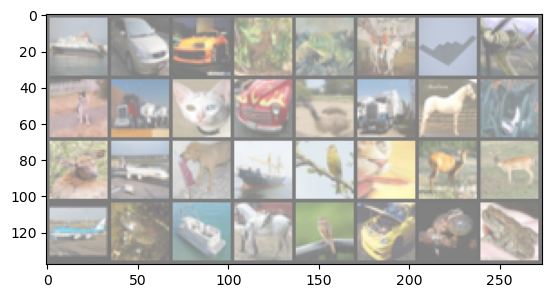

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Images with Added Noise


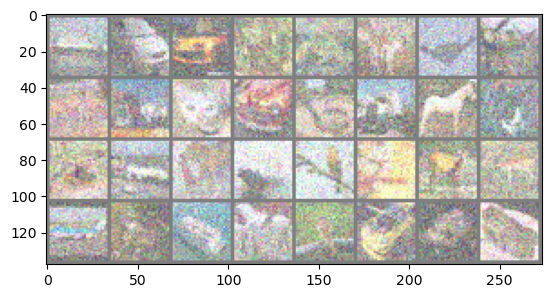

In [12]:
# Your code goes here 

import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Step 2: Load the CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Step 3: Add noise to the images
def add_noise(images, mean=0, std=0.2):
    noise = torch.randn_like(images) * std + mean
    return images + noise

# Step 4: Visualize images with added noise
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Step 5: Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Display original images
print('Original Images')
imshow(torchvision.utils.make_grid(images))

# Display images with added noise
print('Images with Added Noise')
noisy_images = add_noise(images)
imshow(torchvision.utils.make_grid(noisy_images))

# QUESTION 9 (ADVANCED) - Synthetic generation of dataset



This question is a bit more open ended, will require some creativity and extra work. 
Your goal is to generate a synthetic dataset of shapes. Below is some code for generating 
some shapes with matplotlib. Your code should generate random shape using uniform random distributions along the following "dimensions": shape (square, circle, triangle, rhombus), 
color (red, green, blue, yellow, orange, black), size (continuous but should fit in the image), 
x-position (continuous but should fit in the image), y_position (continuous but should fit in the image). Once you create a plot you will need to figure out how to convert it to an image. All your images should be 64 by 64 which is bigger than the CIFAR-10 images. Generate a dataset that has 6000 instances of each shape, and 1000 instances of each color within each shape. Show some sample images by appropriately calling/modifying if needed the imshow() function from the deep learning notebook. 





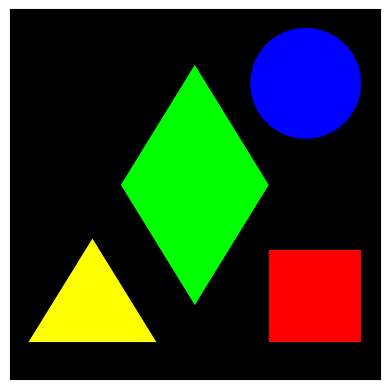

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, Circle, Rectangle

red, blue, yellow, green = '#ff0000', '#0000ff', '#ffff00', '#00ff00'
square = Rectangle((0.7, 0.1), 0.25, 0.25, facecolor=red)
circle = Circle((0.8, 0.8), 0.15, facecolor=blue)
triangle = Polygon(((0.05,0.1), (0.396,0.1), (0.223, 0.38)), fc=yellow)
rhombus = Polygon(((0.5,0.2), (0.7,0.525), (0.5,0.85), (0.3,0.525)),  fc=green)

fig = plt.figure()
ax = fig.add_subplot(111, facecolor='k', aspect='equal')
for shape in (square, circle, triangle, rhombus):
    ax.add_artist(shape)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

plt.show()

In [9]:
import random

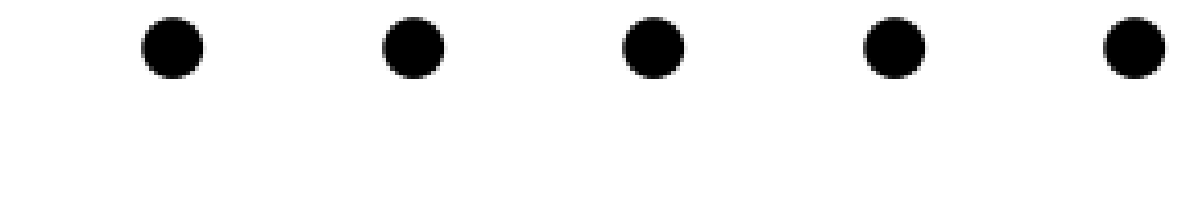

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, Circle, Rectangle
from PIL import Image

# Define colors
colors = ['#ff0000', '#0000ff', '#ffff00', '#00ff00', '#ffa500', '#000000']

# Define shapes
shapes = {
    'square': Rectangle((0.7, 0.1), 0.25, 0.25),
    'circle': Circle((0.8, 0.8), 0.15),
    'triangle': Polygon(((0.05, 0.1), (0.396, 0.1), (0.223, 0.38))),
    'rhombus': Polygon(((0.5, 0.2), (0.7, 0.525), (0.5, 0.85), (0.3, 0.525)))
}

# Set random seed for reproducibility
np.random.seed(42)

# Generate and save images
output_directory = 'synthetic_dataset'
os.makedirs(output_directory, exist_ok=True)

num_instances = 6000
image_size = (64, 64)

for shape_name, shape in shapes.items():
    for color in colors:
        for i in range(num_instances):
            fig, ax = plt.subplots(figsize=(1, 1), dpi=image_size[0])

            if isinstance(shape, Circle):
                shape_instance = Circle(shape.center, shape.radius, facecolor=color)
            elif isinstance(shape, Polygon):
                # For Polygon, extract the xy coordinates from the vertices
                shape_instance = Polygon(shape.get_xy(), facecolor=color)
            else:
                shape_instance = shape.__class__(shape.get_xy(), shape.get_width(), shape.get_height(), facecolor=color)

            ax.add_artist(shape_instance)
            ax.set_xlim(0, 1)
            ax.set_ylim(0, 1)
            ax.axis('off')

            # Save the figure to an image file
            filename = f'{shape_name}_{color}_{i}.png'
            filepath = os.path.join(output_directory, filename)
            plt.savefig(filepath, bbox_inches='tight', pad_inches=0, transparent=True, format='png')
            plt.close()


# Display some sample images
sample_images = os.listdir(output_directory)[:5]
fig, axes = plt.subplots(1, len(sample_images), figsize=(15, 3))

for i, image_filename in enumerate(sample_images):
    image_path = os.path.join(output_directory, image_filename)
    image = Image.open(image_path)
    axes[i].imshow(image)
    axes[i].axis('off')

plt.show()


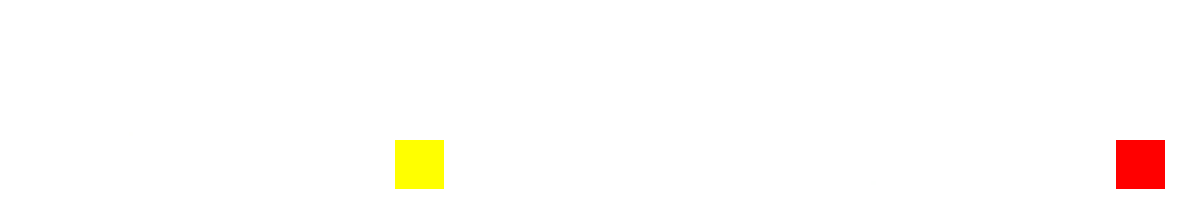

In [198]:

import random
# Get a list of all image filenames in the output directory
all_images = os.listdir(output_directory)
# Randomly select 5 image filenames
sample_images = random.sample(all_images, 5)
fig, axes = plt.subplots(1, len(sample_images), figsize=(15, 3))
for i, image_filename in enumerate(sample_images):
    image_path = os.path.join(output_directory, image_filename)
    image = Image.open(image_path)
    axes[i].imshow(image)
    axes[i].axis('off')
plt.show()


In [141]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, Circle, Rectangle
from PIL import Image
all_images = os.listdir(output_directory)

# QUESTION 10 (ADVANCED) - Deep learning for the synthetic shapes 

Using the deep learning notebook code as a template build a traditional machine learning classifier using Histogram-of-Oriented Gradients features followed by PCA and using a SVM as a classifier. Train classifiers for the following 3 problems: classify shape (irrespective of color), classify color (irrespective of shape), or classify both color and shape (you can train two SVMs one for each problem). Then repeat the same three configurations using a deep learning neural network. 
Report on the classification accuracy and confusion matrices for all 6 configurations (shape-SVM, color-SVM, shape+color SVM, shape-DNN, color-DNN, shape+color DNN). 




In [142]:
class SyntheticDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.file_list = os.listdir(root_dir)

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.file_list[idx])
        image = Image.open(img_name)

        if self.transform:
            image = self.transform(image)

        # Extract labels from the filename or any other logic based on your dataset
        # For example, you can parse shape_name, color, and instance index from the filename
        label = parse_label_from_filename(self.file_list[idx])

        return image, label

# Example function to parse labels from the filename
def parse_label_from_filename(filename):
    parts = filename.split('_')
    shape_name, color, instance_idx = parts[0], parts[1], parts[2]
    # You can customize this based on your filename format
    return {'shape_name': shape_name, 'color': color, 'instance_idx': instance_idx}

# Define your transformations
# Define your transformations
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert to RGB if it's grayscale
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


# Create instances of the custom dataset
train_dataset = SyntheticDataset(root_dir='synthetic_dataset', transform=transform)
test_dataset = SyntheticDataset(root_dir='synthetic_dataset', transform=transform)

# Create data loaders
batch_size = 32
trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
testloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)


print(len(test_dataset))

NameError: name 'Dataset' is not defined

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

print('Training set')
print(f'Samples: {trainset.data.shape}')
print(f'Labels: {len(trainset.targets)}')
print(type(trainset.data))
print(type(trainset.targets))
print('\nTest set')
print(f'Samples: {testset.data.shape}')
print(f'Labels: {len(testset.targets)}')

train_n_samples = len(trainset.data)
print(train_n_samples)
test_n_samples = len(testset.data)
print(test_n_samples)

Xtrain = trainset.data
Xtest  = testset.data



from skimage.feature import hog
Xtrain_hog = []
for i in range(len(Xtrain)):
    fd  = hog(Xtrain[i] , orientations=9 , pixels_per_cell = (8,8),
                     cells_per_block = (2,2) , visualize = False, channel_axis=-1)
    Xtrain_hog.append(fd)
    if ((i % 10000) == 0): 
        print(i)

Xtrain_hog = np.array(Xtrain_hog)
print('Done calculating HOGs for training')
print(Xtrain_hog.shape)

Xtest_hog = []
for i in range(len(Xtest)):
    fd = hog(Xtest[i] , orientations=9 , pixels_per_cell = (8,8),
                     cells_per_block = (2,2) , visualize = False, channel_axis=-1)
    Xtest_hog.append(fd)
    if ((i % 1000) == 0): 
        print(i)
        
Xtest_hog = np.array(Xtest_hog)
print('Done calculating HOGs for testing')

ytrain = trainset.targets
ytest  = testset.targets

from sklearn.decomposition import PCA
pca = PCA(0.8)
Xtrain_pca = pca.fit_transform(Xtrain_hog)
Xtest_pca  = pca.transform(Xtest_hog)
print(Xtrain_pca.shape)
print(Xtest_pca.shape)